<a href="https://colab.research.google.com/github/keshari112k/Stage_E_Tag_Along_Proj/blob/main/Stage_E_Tag_along_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDSC Winter '22 Stage E 
# Name: SHIVAM KESHARWANI
# ID: 1476f9e72bc1f000
# Instructions
## Instruction 1:
###IMPORTANT NOTICE

####We highly recommend that this quiz be done on Google Colab notebook. In this quiz, we’ll explore and build time series forecasting models for measurements of electricity prices  of a District given the total amount of Electricity consumed in that District from 2010 to 2021.

#### Notes:

1. The dataset is sampled on an hourly basis. It has the following features:


> Attribute Information:

> FullDate: Date in format yyyy-mm-dd  hh:mm:ss

> ElecPrice: Prices of electricity charged in Kw per hour

> Gas Price: power generated was done via a gas power plant, gas price is the price of gas at time-T


> SysLoad: Total Load on system or Power consumed at time-T 


> Tmax: maximum temperature at time-T


## Instruction 2: (Q14-Q16)
#### Using the daily sampling rate (sum), divide the data into a train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’). Answer question 14 - 16


## Instruction 3: (Q17-Q19)
#### Multivariate Time Series Forecasting with Facebook Prophet
####In the last exercise, we used only the dependent variable (ElecPrice) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’'] will be [‘add1’, ‘add2’, ‘add3’’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last x-2757 days of ElecPrice. Answer question 17-19:

#### Import libraries and Fetch the dataset

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from fbprophet import Prophet
from sklearn import metrics

In [49]:
url = 'https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv'
forecasting_data = pd.read_csv(url, encoding = 'latin-1')
forecasting_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [50]:
forecasting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [51]:
# Convert FullDate column into Date time
forecasting_data['FullDate'] = pd.to_datetime(forecasting_data['FullDate'])

In [52]:
forecasting_data.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [53]:
forecasting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [54]:
# Set FullDate as an index
forecasting_data.set_index('FullDate', inplace = True)

Text(0.5, 1.0, 'Electricity Price over a time')

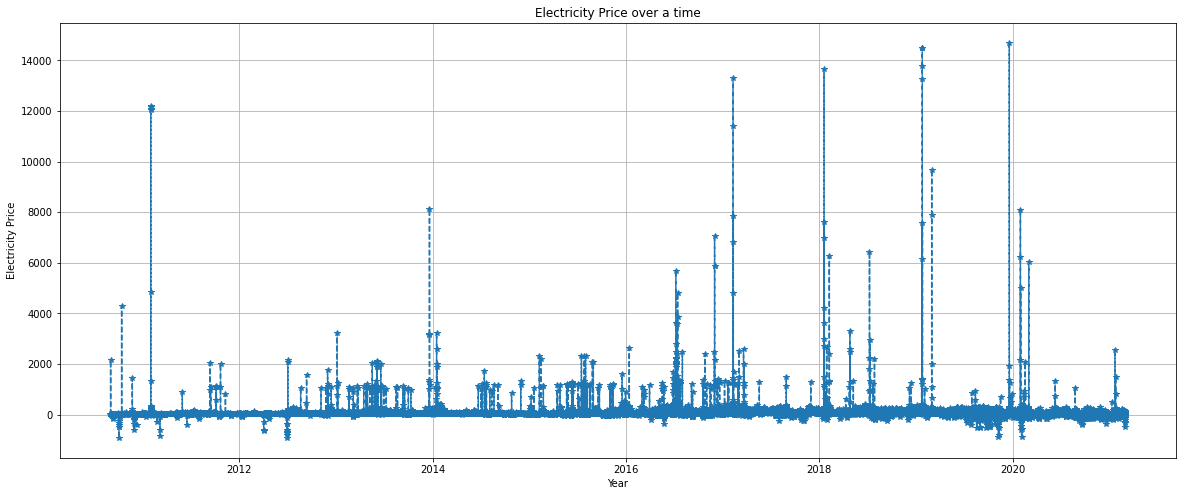

In [55]:
plt.figure(figsize= (20,8) )
plt.plot(forecasting_data.index, forecasting_data.ElecPrice, '--', marker='*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Electricity Price')
plt.title('Electricity Price over a time')

#### Time Series Exploratory Analysis: identify patterns and structure in a dataset

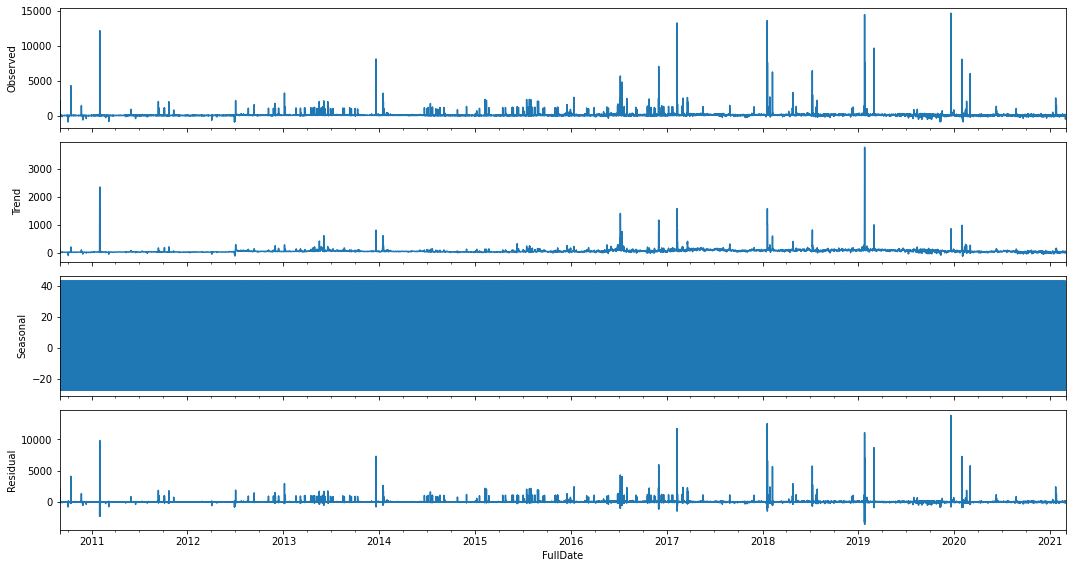

In [56]:
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(forecasting_data['ElecPrice'], model='additive')
decompose_series.plot()
plt.show()

#### Downsampling





In [57]:
quarterly_sample_rate = forecasting_data.resample('3M').sum()
quarterly_sample_rate.head(2)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-30,12172.8,1136264.990,2576.6376,18054.645
2010-12-31,53280.0,2914291.854,5541.6528,45872.860


Text(0.5, 1.0, 'Electricity Price over a time (sampled Data)')

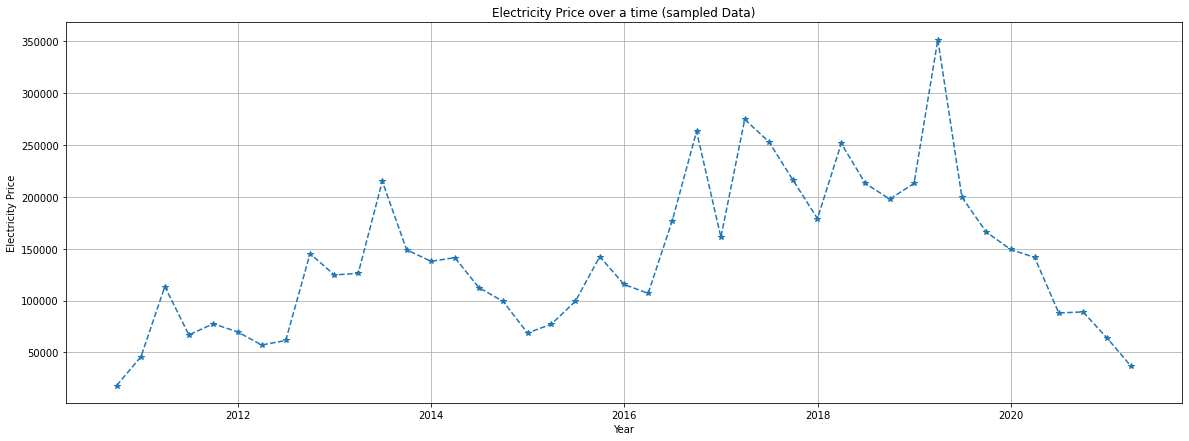

In [58]:
plt.figure(figsize= (20,7) )
plt.plot(quarterly_sample_rate.index, quarterly_sample_rate.ElecPrice, '--', marker='*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Electricity Price')
plt.title('Electricity Price over a time (sampled Data)')

#### Upsampling



In [59]:
daily_sample_rate = forecasting_data.resample('D').sum()
daily_sample_rate.head(2)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38,88.56,2751.70
2010-09-02,369.6,38898.99,88.56,570.81


## Question 11:
##### Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

Text(0.5, 1.0, 'Electricity Price over a time (sampled Data)')

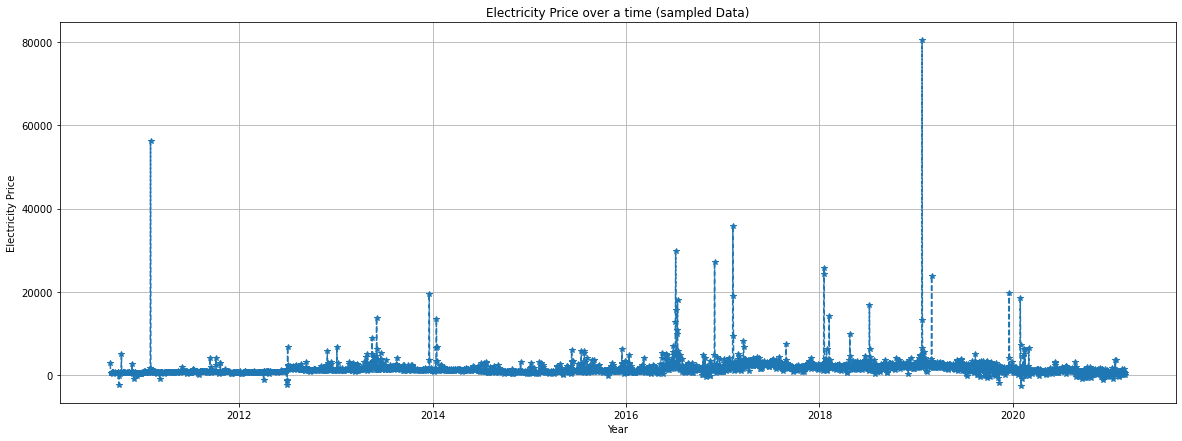

In [60]:
plt.figure(figsize= (20,7) )
plt.plot(daily_sample_rate.index, daily_sample_rate.ElecPrice, '--', marker='*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Electricity Price')
plt.title('Electricity Price over a time (sampled Data)')

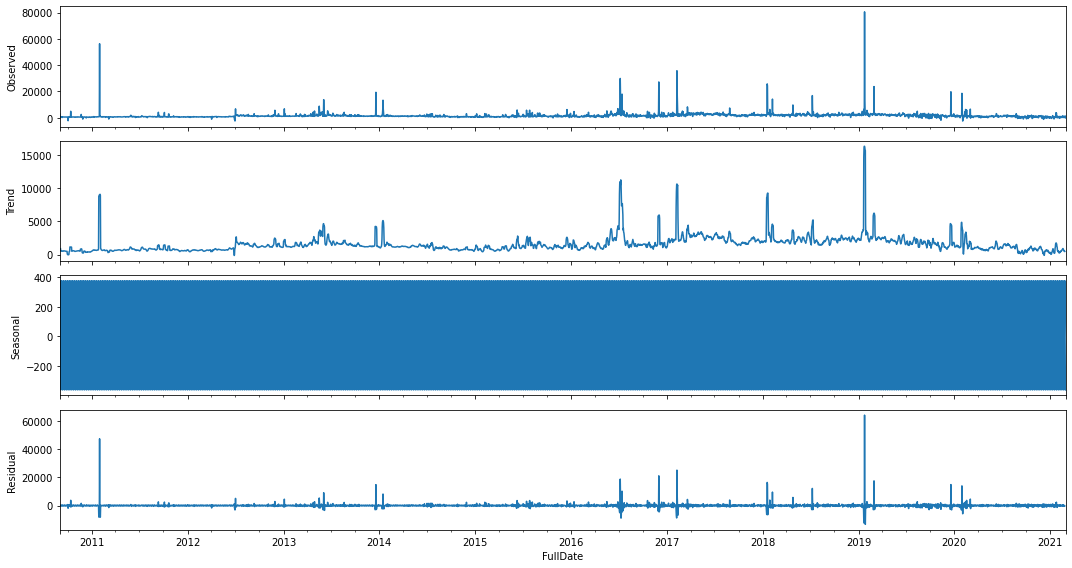

In [61]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(daily_sample_rate['ElecPrice'], model='additive')
decompose_series.plot()
plt.show()

#### ADF Test

In [62]:
# Display the information of ADF test
def display_adfuller_info(adfull):
  print(f'ADF Statistic: {adfull[0]}')
  print(f'p-value: {adfull[1]}')
  print(f'No. of lags used: {adfull[2]}')
  print(f'No. of observations used : {adfull[3]}')
  print('Critical Values:')
  for k, v in adfull[4].items():
      print(f' {k}: {v}')


In [63]:
system_load = adfuller(daily_sample_rate['SysLoad'])

display_adfuller_info(system_load)


ADF Statistic: -3.6901589888366457
p-value: 0.004253725504574117
No. of lags used: 30
No. of observations used : 3803
Critical Values:
 1%: -3.432070672988693
 5%: -2.8623002987378547
 10%: -2.567174716967499


In [64]:
gas_price = adfuller(daily_sample_rate['GasPrice'])

display_adfuller_info(gas_price)


ADF Statistic: -2.90276669716518
p-value: 0.04502721288462542
No. of lags used: 27
No. of observations used : 3806
Critical Values:
 1%: -3.4320693157877544
 5%: -2.8622996992165364
 10%: -2.5671743978048323


In [65]:
elec_price = adfuller(daily_sample_rate['ElecPrice'])

display_adfuller_info(elec_price)


ADF Statistic: -8.269053866873803
p-value: 4.848817773711633e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:
 1%: -3.432066157296446
 5%: -2.8622983040036005
 10%: -2.5671736550459663


## Question 12:
##### Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [66]:
print(f'SysLoad p-value is : {round(system_load[1],6)}')
print(f'GasPrice p-value is : {round(gas_price[1],6)}')

SysLoad p-value is : 0.004254
GasPrice p-value is : 0.045027


## Question 13
##### Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [67]:
print(f'10% critical values of GasPrice is : {round(gas_price[4]["10%"],4)}')
print(f'5% critical values of ElecPrice is : {round(elec_price[4]["5%"],4)}')

10% critical values of GasPrice is : -2.5672
5% critical values of ElecPrice is : -2.8623


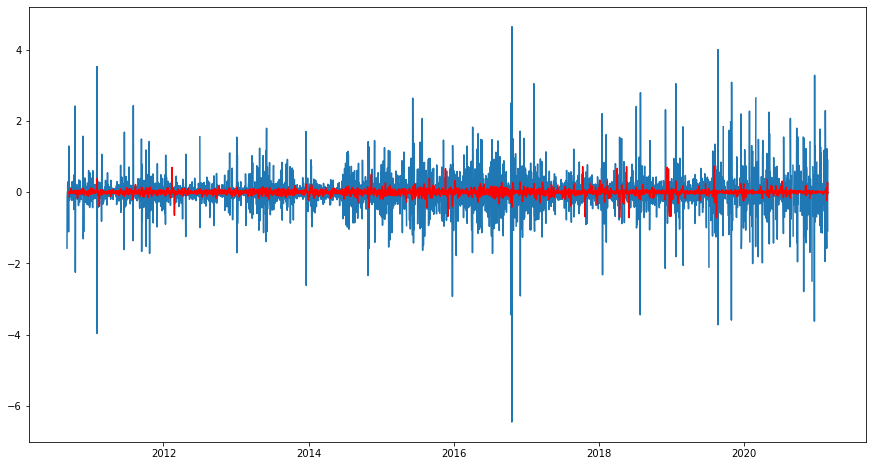

In [68]:
# Log Transformation and Differencing
df_log = np.log(daily_sample_rate)
df_diff = df_log.diff(periods=1)
plt.plot(df_diff.index, df_diff.ElecPrice, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')

#### Univariate time series model

In [69]:
# Split the daily sampled rate into train and test 
train_data = daily_sample_rate.iloc[:2757,:]
testing_data = daily_sample_rate.iloc[2757:,:]
train_data.shape , test_data.shape

((2757, 4), (1077, 5))

In [70]:
# Reset the index
train_data.reset_index(inplace = True)
train_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [71]:
# Rename the columns
train_df = train_data.iloc[:,[0,-1]]
train_df = train_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
train_df.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [72]:
# Reset the index
testing_data.reset_index(inplace = True)
testing_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2018-03-20,540.0,7696.91130,201.5880,1833.00
1,2018-03-21,571.2,4658.05865,203.2560,1730.49
2,2018-03-22,722.4,19161.78525,203.2560,2260.55
3,2018-03-23,811.2,18090.43435,198.6456,2138.76
4,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [73]:
# Rename the columns
testing_df = testing_data.iloc[:,[0,-1]]
testing_df = testing_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
testing_df.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [74]:
# Model Implementation
model = Prophet()
model.fit(train_df)
forecast_result = model.predict(testing_df) 
forecast_result.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,125.840801,4934.058488,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,341.512740,5030.131510,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,367.870391,5256.953063,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,312.031239,4762.036937,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-225.353054,4670.659046,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


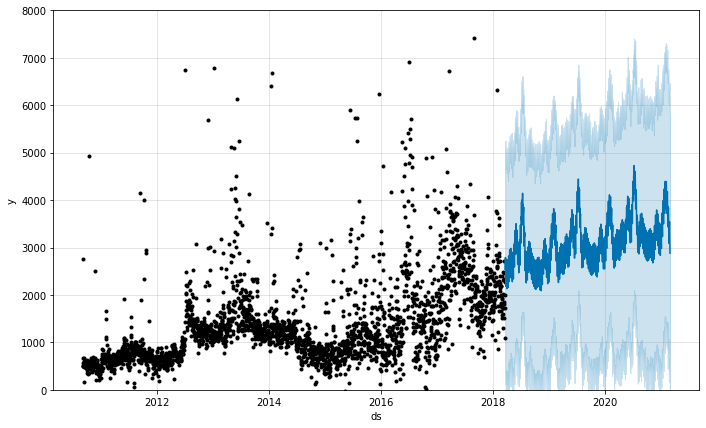

In [75]:
model.plot(forecast_result)
plt.ylim(0,8000)
plt.show()

#### Performance Measure on Univariate time series model

## Question 14:
##### Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

##### Hint:

#####Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it.

In [76]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [77]:
MAPE = Metric(testing_df['y'],forecast_result['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) is: {round(MAPE,2)}')

The Mean Average Percentage Error ( MAPE) is: 549.48


## Question 15:
##### What is the RMSE in 2 decimal places?



In [78]:
RMSE = np.sqrt(metrics.mean_squared_error(testing_df['y'],forecast_result['yhat']))
print(f'The Root Mean Square Error (RMSE) is: {round(RMSE,2)}')

The Root Mean Square Error (RMSE) is: 3218.16


## Question 16:
##### If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?


Answer: July

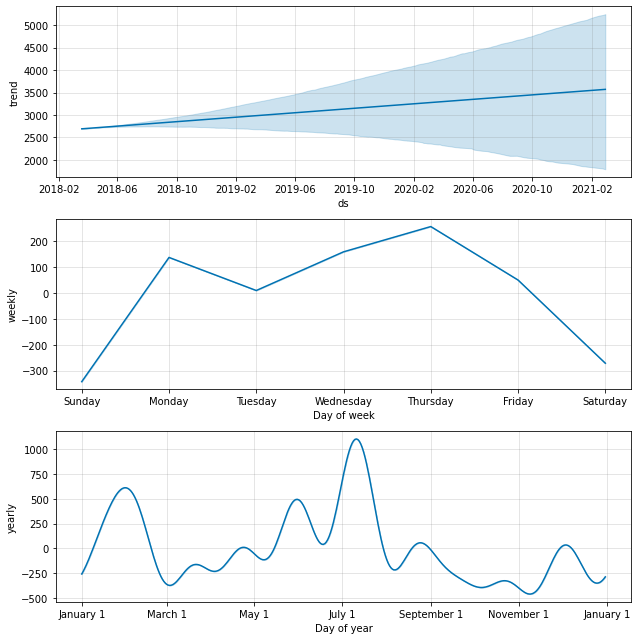

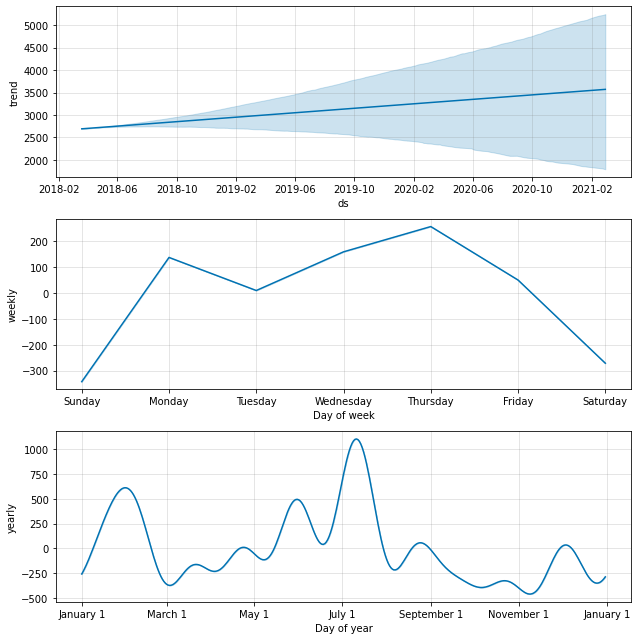

In [79]:
model.plot_components(forecast_result)

#### Multivariate time series model

In [80]:
# Reset the index
daily_sample_rate.reset_index(inplace=True)
daily_sample_rate.head(2)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.70
1,2010-09-02,369.6,38898.99,88.56,570.81


In [81]:
# Rename the columns
dsr = daily_sample_rate.rename(columns = {'FullDate':'ds','Tmax':'add2',
                                           'SysLoad':'add1','GasPrice':'add3',
                                           'ElecPrice':'y'})
dsr.head(3)

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.38,88.56,2751.700
1,2010-09-02,369.6,38898.99,88.56,570.810
2,2010-09-03,439.2,41665.76,106.80,504.975


In [82]:
# Split the dataset
train_dsr = dsr.iloc[:2757,:]
test_dsr = dsr.iloc[2757:,:]

In [83]:
# Model implementation
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model = model.fit(train_dsr)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
forecast_new_result = model.predict(test_dsr)

#### Performance Measure on Multivariate

## Question 17:
##### Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [85]:
MAPE = Metric(test_dsr['y'],forecast_new_result['yhat'])
print(f'The Mean Average Percentage Error (MAPE) is: {round(MAPE,2)}')

The Mean Average Percentage Error (MAPE) is: 233.74



## Question 18: 
##### What is the RMSE in 2 decimal places?

In [86]:
RMSE = np.sqrt(metrics.mean_squared_error(test_dsr['y'],forecast_new_result['yhat']))
print(f'The Root Mean Square Error (RMSE) is: {round(RMSE,2)}')

The Root Mean Square Error (RMSE) is: 2709.65


## Question 19
###### If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?


Answer: Thursday

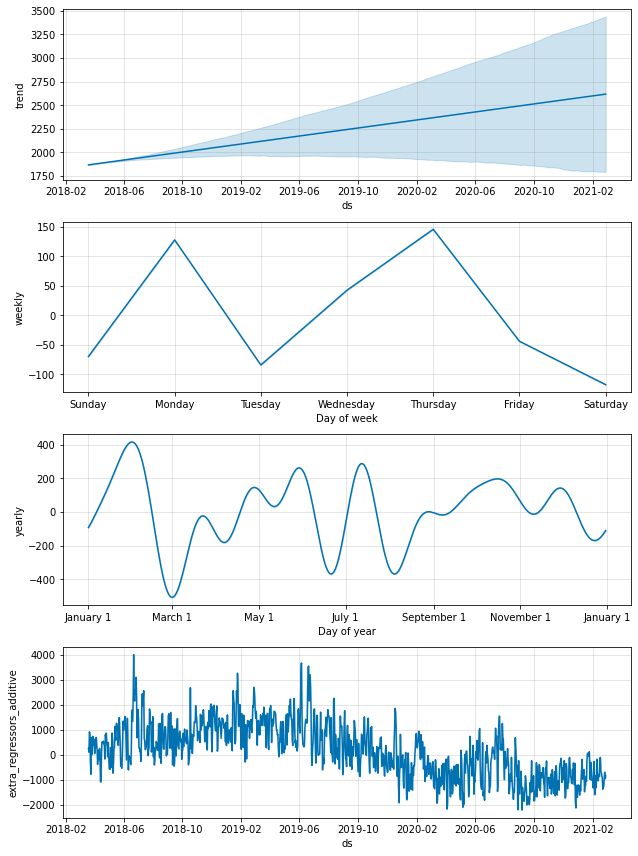

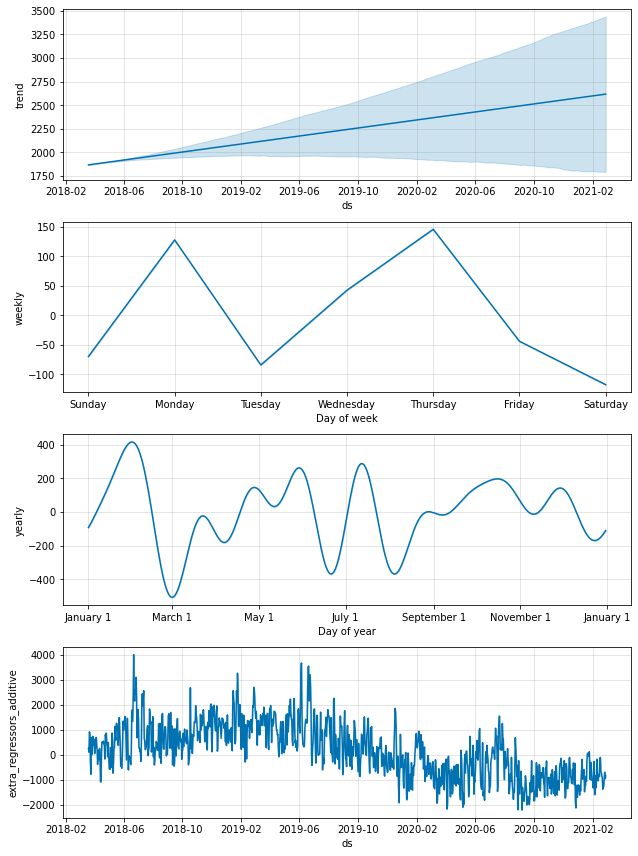

In [87]:
model.plot_components(forecast_new_result)

#### Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max)

#### Multivariate time series model exclude TMAX column

In [88]:
daily_sample_rate.head(2)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.70
1,2010-09-02,369.6,38898.99,88.56,570.81


In [89]:
# Split the dataset
trainData = daily_sample_rate.iloc[:2757,:]
testData = daily_sample_rate.iloc[2757:,:]
trainData.shape , testData.shape

((2757, 5), (1077, 5))

In [90]:
# Exclude the Tmax 
train_df = trainData.iloc[:,[0,2,3,4]]
test_df = testData.iloc[:,[0,2,3,4]]

In [91]:
# Rename the columns
train_df = train_df.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})
test_df = test_df.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})
train_df.head(2)

,ds,add1,add2,y
0,2010-09-01,41565.38,88.56,2751.70
1,2010-09-02,38898.99,88.56,570.81


In [92]:
# Model Implementation
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model = model.fit(train_df)
forecast_values_new = model.predict(test_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Performance Measure on Multivariate without Tmax

##Question 20: 
######What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

In [93]:
MAPE = Metric(test_df['y'],forecast_values_new['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) is:{round(MAPE,2)}')

The Mean Average Percentage Error ( MAPE) is:236.66


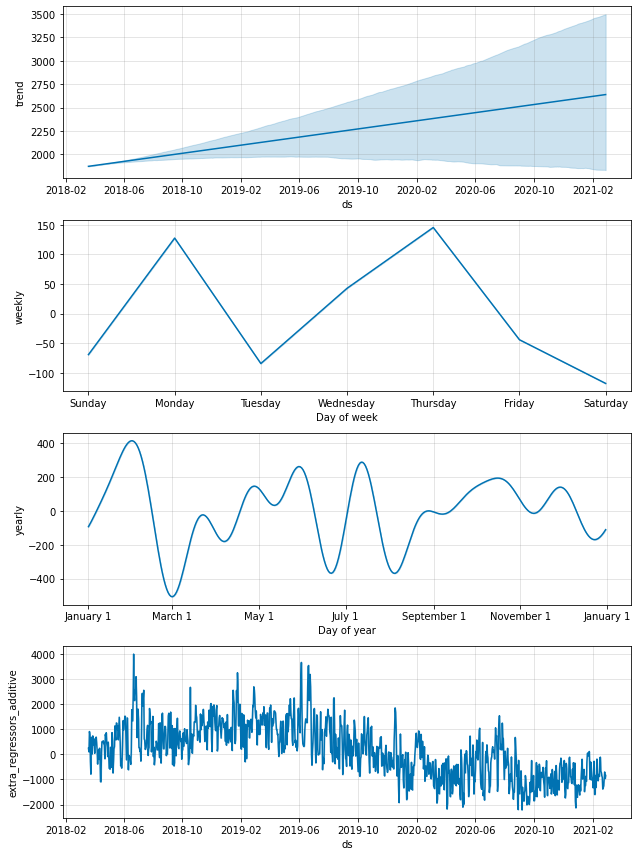

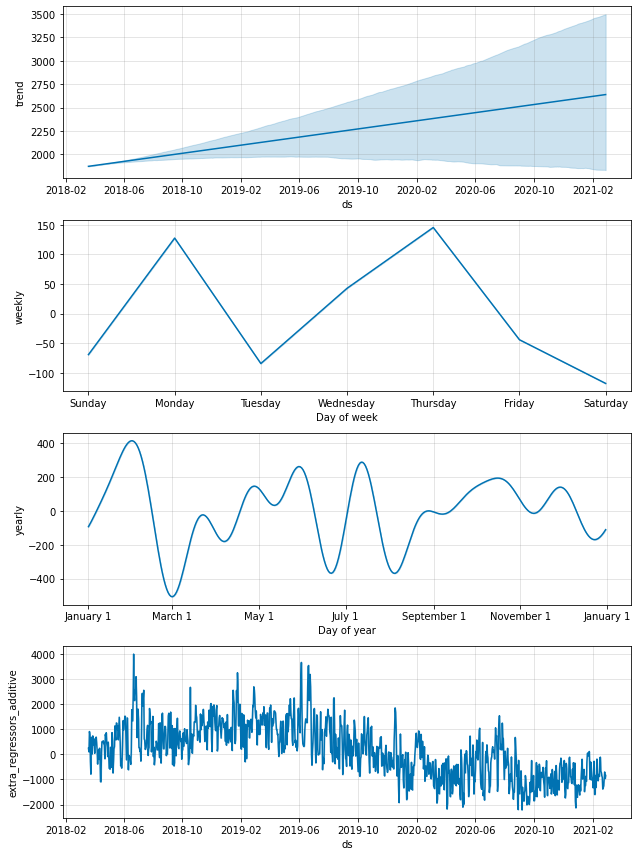

In [94]:
model.plot_components(forecast_values_new)